# Quantum Transport: Atom to Transistor by Supriyo Datta 

***

### How to navigate through this code

<font color = "olive"> <u> 
- In each example, previous variables were killed and a fresh start was conducted.
- Topic and figure numbers are kept same as in the book for reference.    </u> </font>

***

# Table of Contents

4. <font size="3.5">[Basis functions](#fourth-chapter)<br></font>
    4.1. [Basis functions as a computational tool](#4.1)<br>
    4.3. [Equilibrium density matrix](#4.3)<br>
    4.4. [Perturbation theory](#4.4)<br>
    [_References_](#references)<br>

***

# 4. Basis functions <a id="fourth-chapter"></a>

## <font color = "navy" >4.1 Basis functions as a computational tool </font> <a id="4.1"></a>

In [2]:
%reset -f
%matplotlib inline
from pylab import *

In [3]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; m=9.110e-31; epsil=8.854e-12; q=1.602e-19;
a0=4*pi*epsil*hbar*hbar/(m*q*q); E0=q/(8*pi*epsil*a0);

#Basis
L=0.074e-9/a0; s=exp(-L)*(1+L+((L**2)/3));
r=linspace(-2e-10,+2e-10,101); r0=r/a0;
psi=sqrt(1/(pi*(a0**3)))*(exp(-abs(r0-(L/2)))+exp(-abs(r0+(L/2))));
n=2*psi*conj(psi)/(2*(1+s));

a=-2*E0*(1-((1+L)*exp(-2*L)))/L;
b=-2*E0*(1+L)*exp(-L);
EB0=-E0+((a+b)/(1+s));

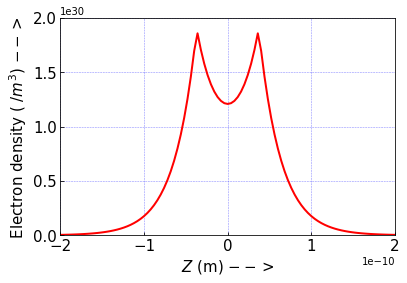

In [4]:
plot(r,n,'r',lw=2)
xlabel(' $Z$ (m) $-->$ ',fontsize=15)
ylabel(' Electron density ('r'$\ /m^3$'') $-->$ ',fontsize=15)
xlim(-2e-10,2e-10)
ylim(0,2e30)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 4.1.4__ Plot of electron density along the axis joining two hydrogen atoms assuming they are separated by the equilibrium bond distance of $R$ = 0.074 nm. </font>

***

## <font color = "navy" >4.3 Equilibrium density matrix </font> <a id="4.3"></a>

In [61]:
%reset -f
%matplotlib inline
from pylab import *

In [62]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; m=9.110e-31; q=1.602e-19; mu=0.25; kT=0.025;

#Lattice
Np=100; a=2e-10; X=a*array(list(range(1,Np+1))); t0=(hbar**2)/(2*m*(a**2))/q; U=linspace(0,0,Np);
T=(2*t0*diag(ones((Np)))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1))); 
[D,V]=eigh(T+diag(U)); E=sort(transpose(D)); D=D-mu;

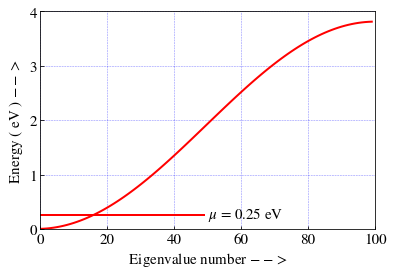

In [63]:
plot(E,'r',lw=2)
plot(mu*ones((Np//2,1)),'r',lw=2)
xlabel(' Eigenvalue number $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,100)
ylim(0,4)
tick_params(axis='both',which='major',labelsize=15,direction='in')
text(50,0.2,'$\mu$ = 0.25 eV',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 4.3.1__ (b) Energy eigenvalues and electrochemical potential $\mu$. </font>

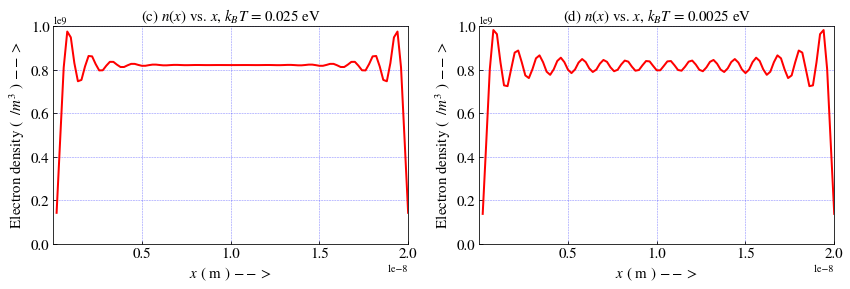

In [64]:
figure(figsize=(14,4))
subplot(1,2,1)
kT=0.025;
rho=1/(1+exp(D/kT)); rho=dot(dot(V,diag(rho)),transpose(V)); rho=diag(rho)/a;
plot(X,rho,'r',lw=2)
xlabel(' $x$ ( m ) $-->$ ',fontsize=15)
ylabel(' Electron density ( $\ /m^3$ ) $-->$ ',fontsize=15)
xlim(0,2e-8)
ylim(0,10e8)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.5e-8,2.5e-8,0.5e-8))
title('(c) $n(x)$ vs. $x$, $k_BT$ = 0.025 eV',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
kT=0.0025;
rho=1/(1+exp(D/kT)); rho=dot(dot(V,diag(rho)),transpose(V)); rho=diag(rho)/a;
plot(X,rho,'r',lw=2)
xlabel(' $x$ ( m ) $-->$ ',fontsize=15)
ylabel(' Electron density ( $\ /m^3$ ) $-->$ ',fontsize=15)
xlim(0,2e-8)
ylim(0,10e8)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.5e-8,2.5e-8,0.5e-8))
title('(d) $n(x)$ vs. $x$, $k_BT$ = 0.0025 eV',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

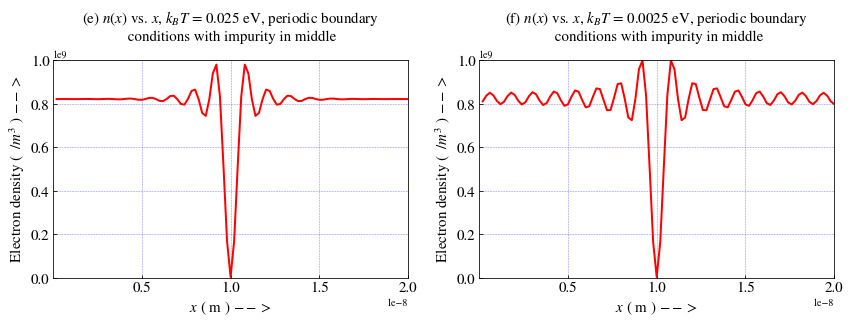

In [65]:
T[0,Np-1]=-t0; T[Np-1,0]=-t0; #Periodic boundary conditions for Parts (e), (f) 
U[Np//2-1]=U[Np//2-1]+10; #Impurity potential with Parts (e), (f)

[D,V]=eigh(T+diag(U)); E=sort(transpose(D)); 
D=D-mu;

figure(figsize=(14,4))
subplot(1,2,1)
kT=0.025;
rho=1/(1+exp(D/kT)); rho=dot(dot(V,diag(rho)),transpose(V)); rho=diag(rho)/a;
plot(X,rho,'r',lw=2)
xlabel(' $x$ ( m ) $-->$ ',fontsize=15) 
ylabel(' Electron density ( $\ /m^3$ ) $-->$ ',fontsize=15) 
xlim(0,2e-8)
ylim(0,10e8)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.5e-8,2.5e-8,0.5e-8))
title('(e) $n(x)$ vs. $x$, $k_BT$ = 0.025 eV, periodic boundary \n conditions with impurity in middle\n',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
kT=0.0025;
rho=1/(1+exp(D/kT)); rho=dot(dot(V,diag(rho)),transpose(V)); rho=diag(rho)/a;
plot(X,rho,'r',lw=2)
xlabel(' $x$ ( m ) $-->$ ',fontsize=15) 
ylabel(' Electron density ( $\ /m^3$ ) $-->$ ',fontsize=15)
xlim(0,2e-8)
ylim(0,10e8)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.5e-8,2.5e-8,0.5e-8))
title('(f) $n(x)$ vs. $x$, $k_BT$ = 0.0025 eV, periodic boundary \n conditions with impurity in middle\n',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 4.3.1__ Equilibrium electron density for a 1D box modeled with a discrete lattice of 100 points spaced by 2$\mathring{A}$. </font>

## <font color = "navy" >4.4 Perturbation theory </font> <a id="4.4"></a>

In [66]:
%reset -f
%matplotlib inline
from pylab import *

In [67]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; m=9.110e-31; epsil=8.854e-12; q=1.602e-19;
a0=4*pi*epsil*hbar*hbar/(m*q*q); E0=q/(8*pi*epsil*a0);
F=linspace(0,1e9,11); A=(a0*128*sqrt(2)/243)*F; B=(-3*a0)*F;

#Initializing arrays
E1=zeros((11)); E2=zeros((11)); E3=zeros((11)); 

for kF in range(0,11):
    M=array([[-E0,0,A[kF-1]],[0,-E0/4,B[kF-1]],[A[kF-1],B[kF-1],-E0/4]]);
    [D,V]=eigh(M); DD=sort(D); ind=array(list(range(0,len(M))));
    E1[kF-1]=D[ind[0]]; E2[kF-1]=D[ind[1]]; E3[kF-1]=D[ind[2]];

#perturbation theory results
E1s=-E0-((A**2)/(3*E0/4));
E2s=-(E0/4)+B;
E2p=-(E0/4)-B;

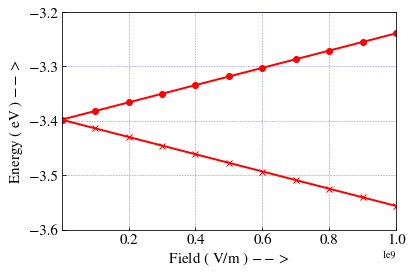

In [68]:
plot(F,E2,'r',lw=2)
plot(F,E3,'r',lw=2)
plot(F,E2s,'rx',lw=2)
plot(F,E2p,'ro',lw=2)
xlabel(' Field ( V/m ) $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,1e9)
ylim(-3.6,-3.2)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2e9,1.2e9,0.2e9))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 4.4.1__ Energy of 2s – 2p$_z$ levels due to an applied electric field $F$. The solid lines show the results obtained by direct diagonalization while ◦ and × show perturbation theory results $E = E_2 ± B$. </font>

***

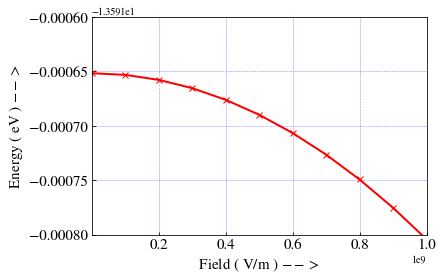

In [69]:
plot(F,E1,'r',lw=2)
plot(F,E1s,'rx',lw=2)
xlabel(' Field ( V/m ) $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,1e9)
ylim(-13.5918,-13.5916)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2e9,1.2e9,0.2e9))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 4.4.2__ Energy of 1s level due to an applied electric field $F$. The solid curve shows the results obtained by direct diagonalization while the crosses denote the perturbation theory results $E = E_1 + (A^2/(E_1 − E_2))$. </font>

***